## Análisis de datos e implementacion de modelos.
En este cuaderno llevaremos a cabo el análisis de nuestros datos transformados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [2]:
url = "https://raw.githubusercontent.com/has-git-source/data-engineering-2025/main/Proyecto%20Aws/recursos/datos_clima_new.csv"
df = pd.read_csv(url)
df.head()

,year,date,precipitacion_hora,velocidad_viento,temperatura_max,temperatura_min,lluvia_total,radiacion_solar
0,2019,2019-03-25,0.0,26.1,26.7,9.3,0.0,28.40
1,2019,2019-04-19,1.0,23.8,24.2,10.7,0.1,20.67
2,2019,2019-05-13,0.0,28.0,29.2,11.3,0.0,27.08
3,2019,2019-05-16,4.0,19.2,28.4,12.1,0.8,22.20
4,2019,2019-08-06,18.0,10.5,20.8,13.4,28.8,16.92


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                2192 non-null   int64  
 1   date                2192 non-null   object 
 2   precipitacion_hora  2192 non-null   float64
 3   velocidad_viento    2192 non-null   float64
 4   temperatura_max     2192 non-null   float64
 5   temperatura_min     2192 non-null   float64
 6   lluvia_total        2192 non-null   float64
 7   radiacion_solar     2192 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.1+ KB


In [4]:
df.describe()

,year,precipitacion_hora,velocidad_viento,temperatura_max,temperatura_min,lluvia_total,radiacion_solar
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2021.500456,4.145985,15.915237,23.781022,10.273312,2.892199,22.071286
std,1.708571,5.911074,5.225494,3.293876,2.900313,6.094310,4.248197
min,2019.000000,0.000000,5.100000,13.800000,0.400000,0.000000,5.310000
25%,2020.000000,0.000000,11.600000,21.400000,8.300000,0.000000,19.550000
50%,2021.500000,1.000000,15.100000,23.250000,10.800000,0.100000,22.190000
75%,2023.000000,7.000000,19.525000,25.925000,12.700000,2.600000,25.272500
max,2024.000000,24.000000,35.300000,34.600000,17.100000,52.800000,31.630000


In [32]:
numerical_columns = ["precipitacion_hora","velocidad_viento","temperatura_max","temperatura_min","lluvia_total","radiacion_solar"]

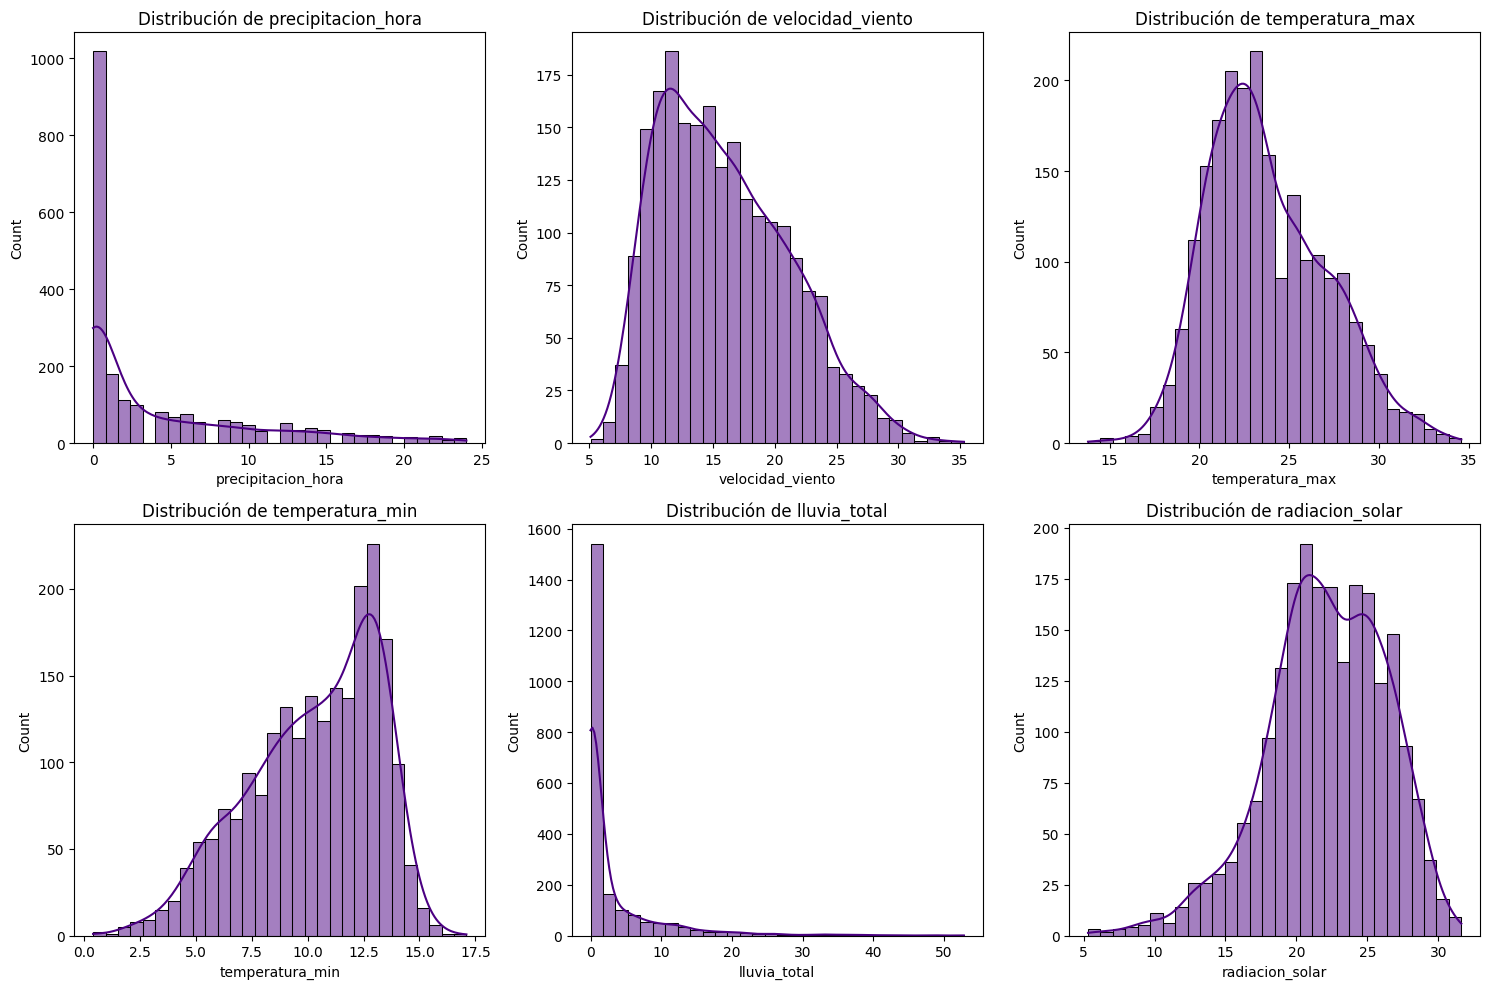

In [6]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="indigo")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

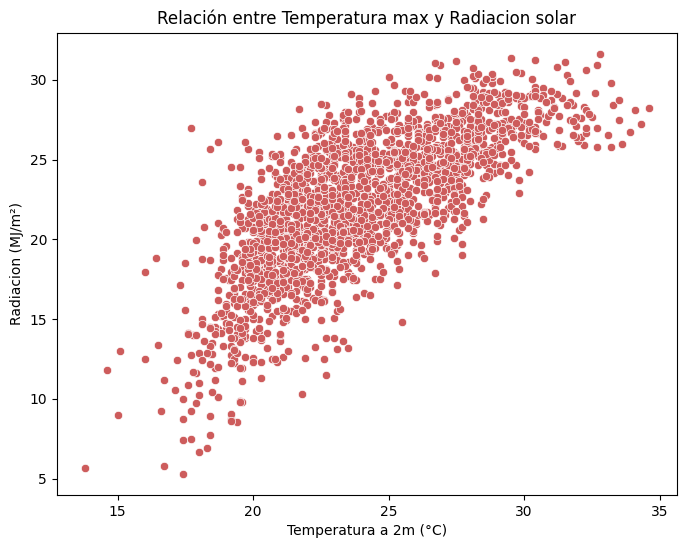

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="temperatura_max", y="radiacion_solar", color="indianred")
plt.title('Relación entre Temperatura max y Radiacion solar')
plt.xlabel("Temperatura a 2m (°C)")
plt.ylabel("Radiacion (MJ/m²)")
plt.show()

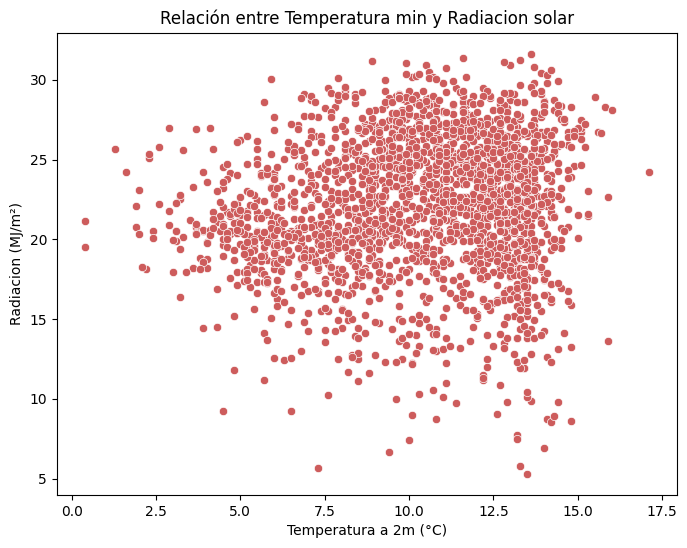

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="temperatura_min", y="radiacion_solar", color="indianred")
plt.title('Relación entre Temperatura min y Radiacion solar')
plt.xlabel("Temperatura a 2m (°C)")
plt.ylabel("Radiacion (MJ/m²)")
plt.show()

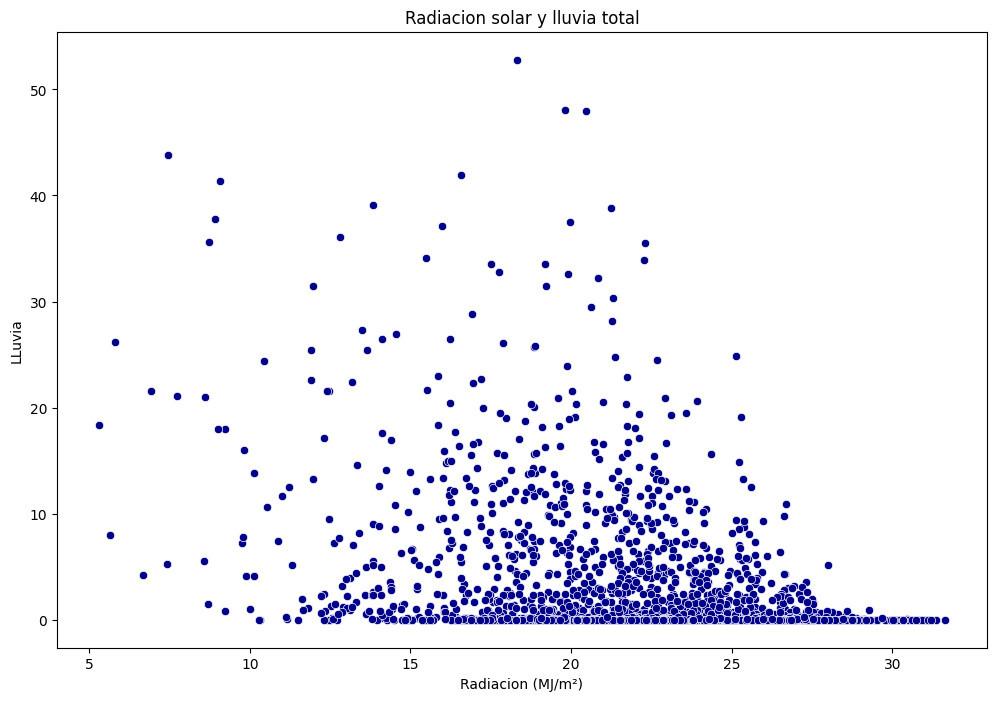

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="radiacion_solar", y="lluvia_total", color = "darkblue")
plt.title("Radiacion solar y lluvia total")
plt.xlabel("Radiacion (MJ/m²)")
plt.ylabel("LLuvia")
plt.show()

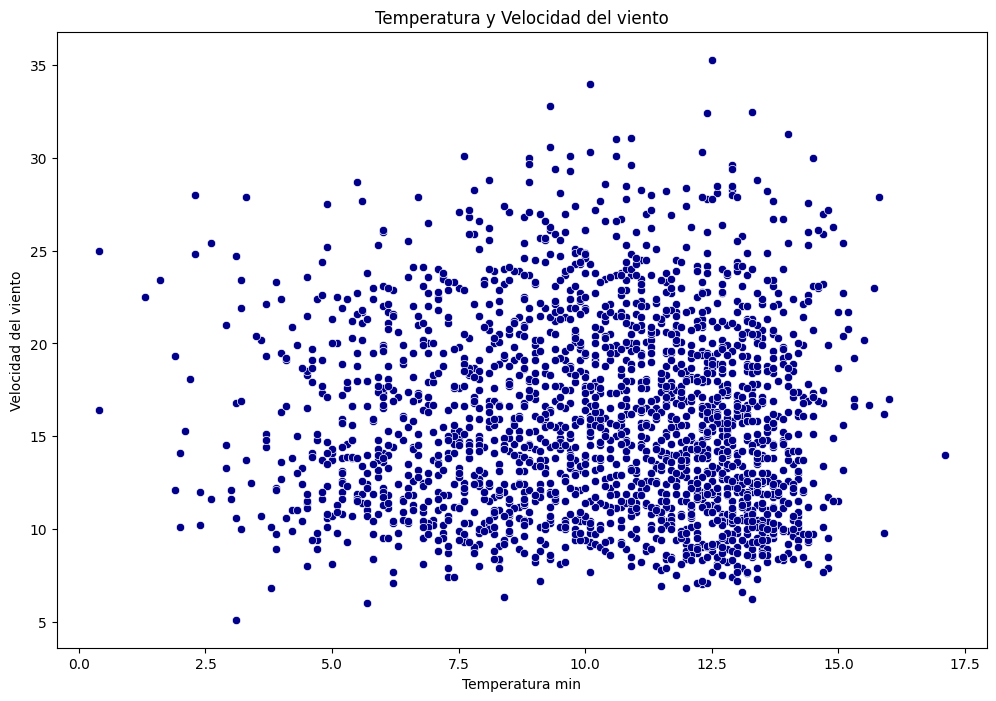

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="temperatura_min", y="velocidad_viento", color = "darkblue")
plt.title("Temperatura y Velocidad del viento")
plt.xlabel("Temperatura min")
plt.ylabel("Velocidad del viento")
plt.show()

Text(0, 0.5, 'Lluvia total')

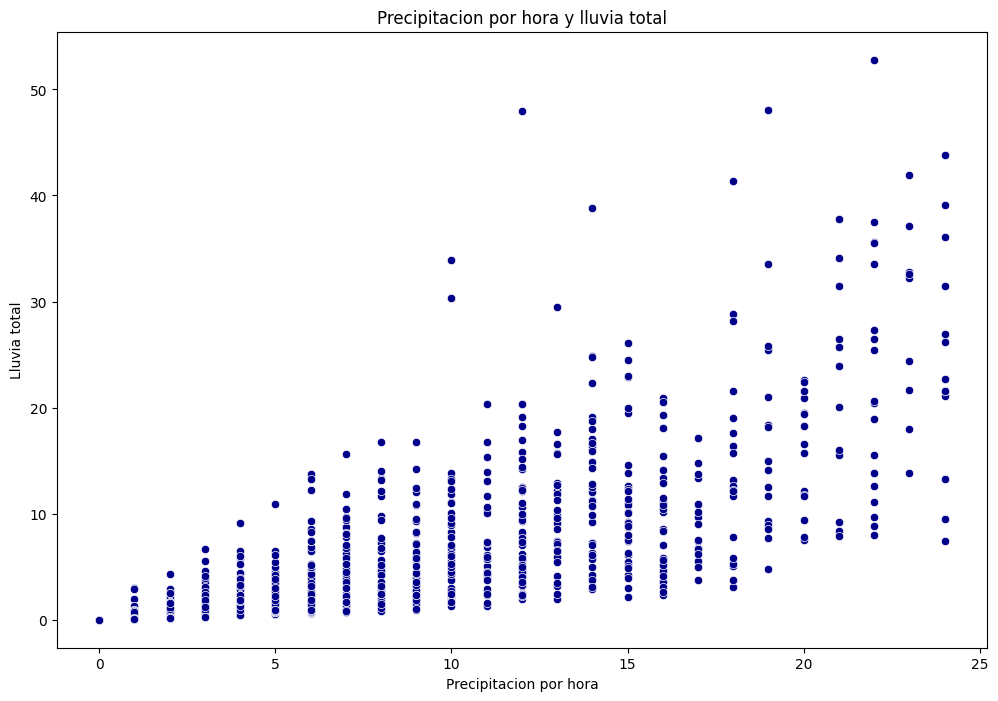

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="precipitacion_hora", y="lluvia_total", color = "darkblue")
plt.title("Precipitacion por hora y lluvia total")
plt.xlabel("Precipitacion por hora")
plt.ylabel("Lluvia total")

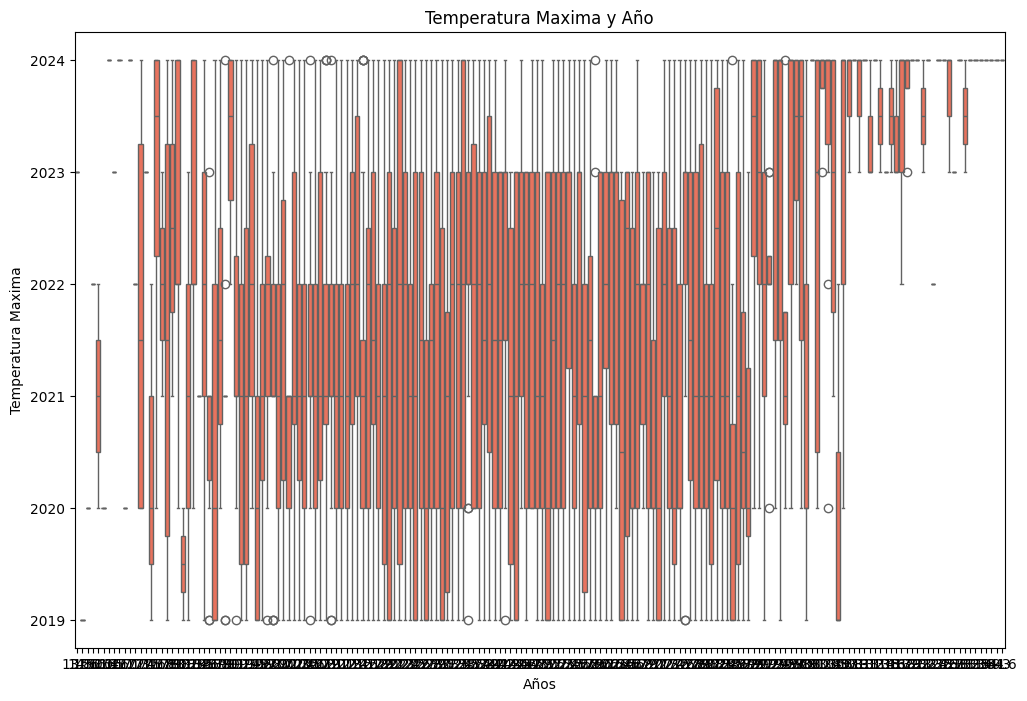

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="temperatura_max", y="year", color = "tomato")
plt.title("Temperatura Maxima y Año")
plt.xlabel("Años")
plt.ylabel("Temperatura Maxima")
plt.show()

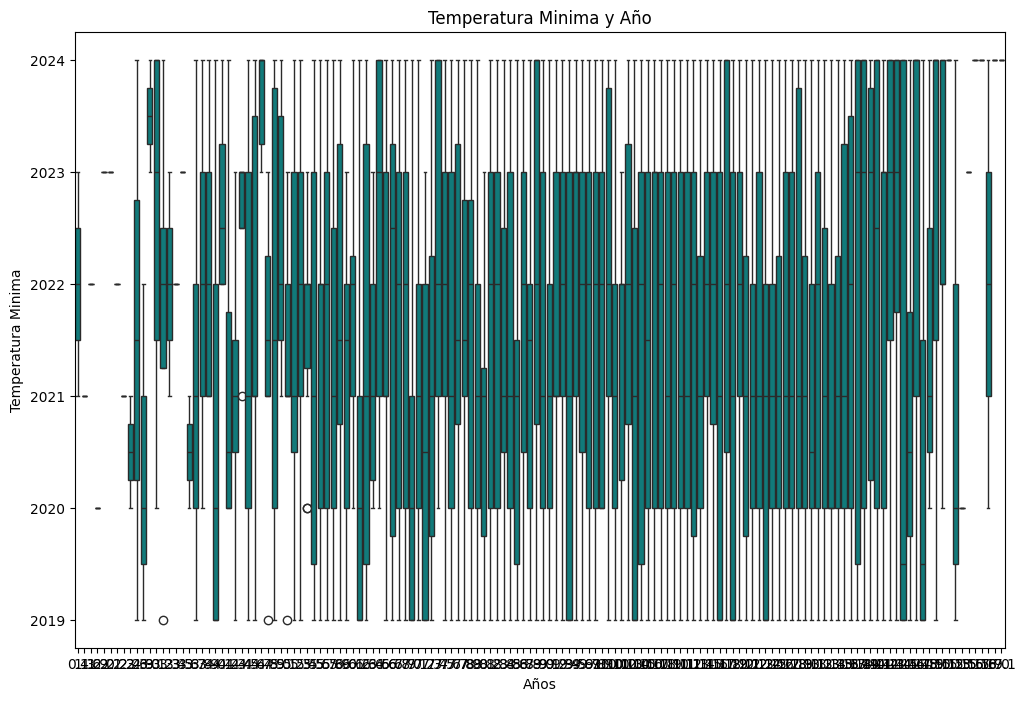

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="temperatura_min", y="year", color = "darkcyan")
plt.title("Temperatura Minima y Año")
plt.xlabel("Años")
plt.ylabel("Temperatura Minima")
plt.show()

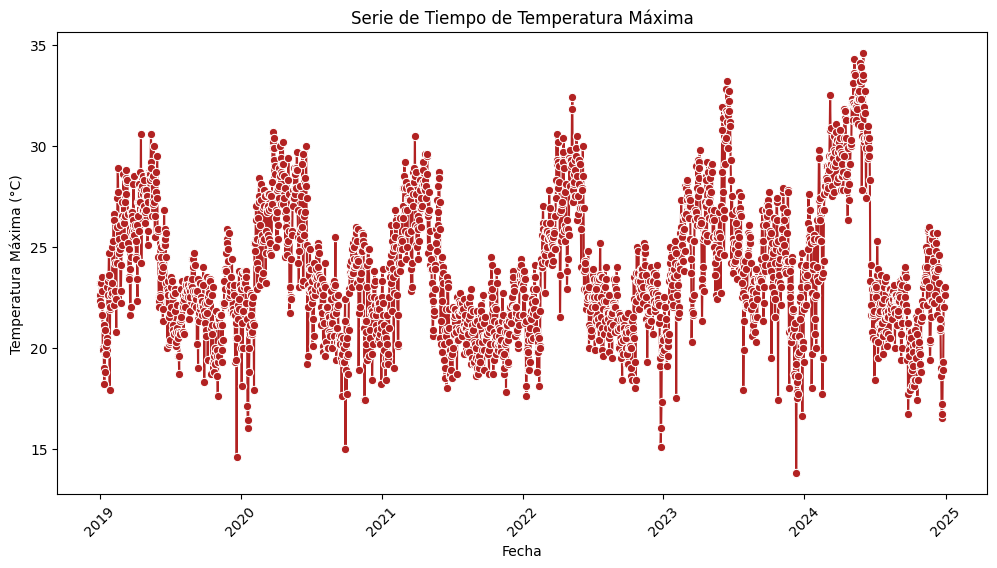

In [15]:
# Asegurar que 'date' sea de tipo datetime
df["date"] = pd.to_datetime(df["date"])

# Ordenar el DataFrame por fecha
df = df.sort_values(by="date")

# Crear la gráfica de serie de tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="temperatura_max", marker="o", color="firebrick")

# Configuración del gráfico
plt.title("Serie de Tiempo de Temperatura Máxima")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Máxima (°C)")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


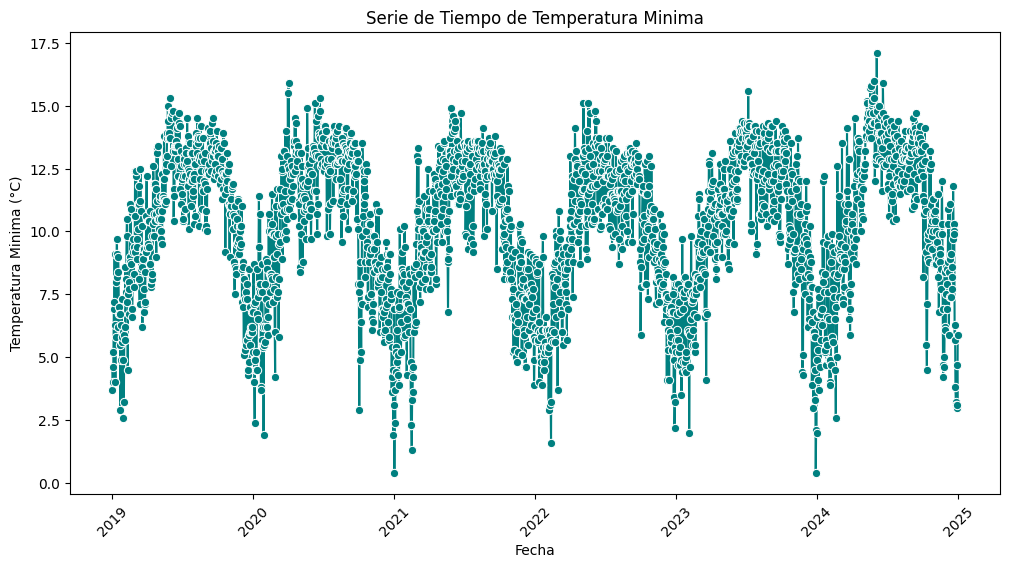

In [16]:
# Crear la gráfica de serie de tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="temperatura_min", marker="o", color="teal")

# Configuración del gráfico
plt.title("Serie de Tiempo de Temperatura Minima")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Minima (°C)")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

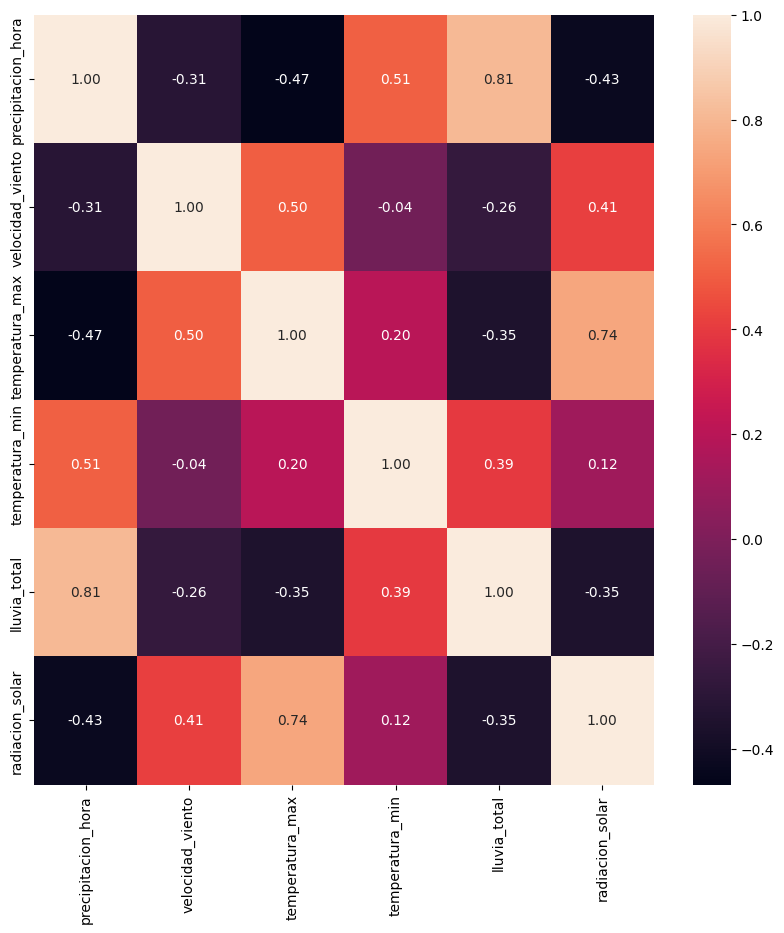

In [17]:
df_numericas = df.select_dtypes(include=["number"]).drop(columns=["year", "date"], errors="ignore")


# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df_numericas.corr(), annot=True, fmt='.2f')
plt.show

## Normalización de variables


In [33]:
# Crear una copia del DataFrame para escalado
df_scaled = df.copy()

In [34]:

# Aplicar el escalado a las columnas numéricas
# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_scaled.describe()

Primeras filas del DataFrame escalado:


,year,date,precipitacion_hora,velocidad_viento,temperatura_max,temperatura_min,lluvia_total,radiacion_solar
count,2192.000000,2192,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2021.500456,2021-12-31 12:00:00,0.172749,0.358120,0.479857,0.591216,0.054776,0.636827
min,2019.000000,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,2020-07-01 18:00:00,0.000000,0.215232,0.365385,0.473054,0.000000,0.541033
50%,2021.500000,2021-12-31 12:00:00,0.041667,0.331126,0.454327,0.622754,0.001894,0.641337
75%,2023.000000,2023-07-02 06:00:00,0.291667,0.477649,0.582933,0.736527,0.049242,0.758454
max,2024.000000,2024-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.708571,NaN,0.246295,0.173030,0.158359,0.173671,0.115423,0.161406


In [35]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras = ["precipitacion_hora", "temperatura_min", "temperatura_max", "velocidad_viento", "lluvia_total"]
objetivo = "radiacion_solar"

# Variables predictoras (X) y variable objetivo (y)
X = df_scaled[predictoras]
y = df_scaled[objetivo]

In [36]:

# Definir el número de características que queremos retener
k = 3  # Por ejemplo, seleccionaremos las 3 características más relevantes

# Crear el selector de características usando f_regression
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustar el selector a los datos
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas por SelectKBest:")
print(selected_features.tolist())


Características seleccionadas por SelectKBest:
['precipitacion_hora', 'temperatura_max', 'velocidad_viento']


In [37]:

# Definir el número de características a seleccionar
k = 3  # Por ejemplo, seleccionaremos las 3 características más relevantes

# Inicializar el selector con mutual_info_regression como función de puntuación
selector = SelectKBest(score_func=mutual_info_regression, k=k)

# Ajustar el selector a los datos y transformar X para obtener únicamente las k mejores características
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas por SelectKBest con mutual_info_regression:")
print(selected_features.tolist())

Características seleccionadas por SelectKBest con mutual_info_regression:
['precipitacion_hora', 'temperatura_max', 'velocidad_viento']


## Random Forest

In [38]:
# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_scaled.describe()

Primeras filas del DataFrame escalado:


,year,date,precipitacion_hora,velocidad_viento,temperatura_max,temperatura_min,lluvia_total,radiacion_solar
count,2192.000000,2192,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2021.500456,2021-12-31 12:00:00,0.172749,0.358120,0.479857,0.591216,0.054776,0.636827
min,2019.000000,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,2020-07-01 18:00:00,0.000000,0.215232,0.365385,0.473054,0.000000,0.541033
50%,2021.500000,2021-12-31 12:00:00,0.041667,0.331126,0.454327,0.622754,0.001894,0.641337
75%,2023.000000,2023-07-02 06:00:00,0.291667,0.477649,0.582933,0.736527,0.049242,0.758454
max,2024.000000,2024-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.708571,NaN,0.246295,0.173030,0.158359,0.173671,0.115423,0.161406


In [79]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2192 entries, 1458 to 282
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 2192 non-null   int64         
 1   date                 2192 non-null   datetime64[ns]
 2   precipitacion_hora   2192 non-null   float64       
 3   velocidad_viento     2192 non-null   float64       
 4   temperatura_max      2192 non-null   float64       
 5   temperatura_min      2192 non-null   float64       
 6   lluvia_total         2192 non-null   float64       
 7   radiacion_solar      2192 non-null   float64       
 8   radiacion_solar_cat  2192 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), int64(1)
memory usage: 156.5 KB


In [78]:
df_scaled["radiacion_solar_cat"] = pd.cut(df_scaled["radiacion_solar"], bins=4, labels=["Baja", "Media", "Alta", "Muy Alta"])

In [84]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras_rf = ["precipitacion_hora", "velocidad_viento", "temperatura_max"]
objetivo_rf = "radiacion_solar_cat"

# Variables predictoras (X) y variable objetivo (y)
X_rf = df_scaled[predictoras_rf]
y_rf = df_scaled[objetivo_rf]

In [85]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [86]:
# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred_rf = rf_model.predict(X_test)

In [88]:

# Cálculo de métricas para RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=True)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=True)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=True)

print("Accuracy:", accuracy_rf)
print("Precision (macro):", precision_rf)
print("Recall (macro):", recall_rf)
print("F1-score (macro):", f1_rf)

Accuracy: 0.6788154897494305
Precision (macro): 0.6742429544606195
Recall (macro): 0.5377115455982756
F1-score (macro): 0.5807609098944749


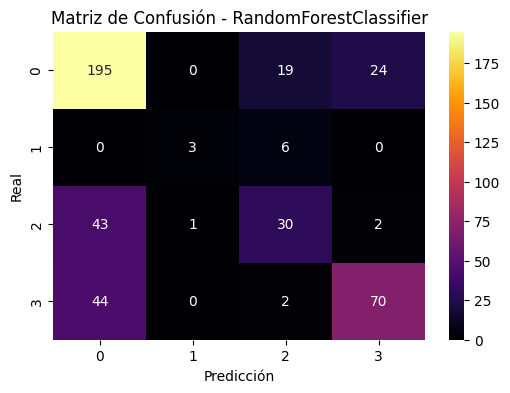

In [89]:

cm_rf = confusion_matrix(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='inferno')
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Regresión Logistica

In [90]:
# Crear el modelo de regresión logística
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg_model.predict(X_test)

In [91]:
# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("=== Regresión Logística ===")
print("Accuracy:  {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall:    {:.4f}".format(recall))
print("F1 Score:  {:.4f}".format(f1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Regresión Logística ===
Accuracy:  0.6651
Precision: 0.6360
Recall:    0.6651
F1 Score:  0.6204

Classification Report:
              precision    recall  f1-score   support

        Alta       0.65      0.89      0.75       238
        Baja       0.00      0.00      0.00         9
       Media       0.50      0.13      0.21        76
    Muy Alta       0.74      0.60      0.66       116

    accuracy                           0.67       439
   macro avg       0.47      0.41      0.41       439
weighted avg       0.64      0.67      0.62       439



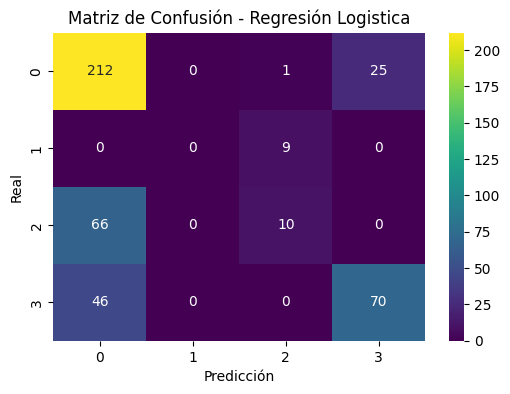

In [92]:
cm_rf_l = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_l, annot=True, fmt='d', cmap='viridis')
plt.title("Matriz de Confusión - Regresión Logistica")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## RandomForest Regressor

In [68]:
# Crear una copia del DataFrame para escalado
df_scaled_2 = df.copy()

In [69]:
# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_scaled_2[numerical_columns] = scaler.fit_transform(df_scaled_2[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_scaled_2.describe()

Primeras filas del DataFrame escalado:


,year,date,precipitacion_hora,velocidad_viento,temperatura_max,temperatura_min,lluvia_total,radiacion_solar
count,2192.000000,2192,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2021.500456,2021-12-31 12:00:00,0.172749,0.358120,0.479857,0.591216,0.054776,0.636827
min,2019.000000,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,2020-07-01 18:00:00,0.000000,0.215232,0.365385,0.473054,0.000000,0.541033
50%,2021.500000,2021-12-31 12:00:00,0.041667,0.331126,0.454327,0.622754,0.001894,0.641337
75%,2023.000000,2023-07-02 06:00:00,0.291667,0.477649,0.582933,0.736527,0.049242,0.758454
max,2024.000000,2024-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.708571,NaN,0.246295,0.173030,0.158359,0.173671,0.115423,0.161406


In [75]:
df_scaled_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2192 entries, 1458 to 282
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                2192 non-null   int64         
 1   date                2192 non-null   datetime64[ns]
 2   precipitacion_hora  2192 non-null   float64       
 3   velocidad_viento    2192 non-null   float64       
 4   temperatura_max     2192 non-null   float64       
 5   temperatura_min     2192 non-null   float64       
 6   lluvia_total        2192 non-null   float64       
 7   radiacion_solar     2192 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 154.1 KB


In [70]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictora_rfr = ["precipitacion_hora", "velocidad_viento", "temperatura_max"]
objetivo_rfr = "radiacion_solar"

# Variables predictoras (X) y variable objetivo (y)
X_rfr = df_scaled_2[predictora_rfr]
y_rfr = df_scaled_2[objetivo_rfr]

In [71]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_rfr, y_rfr, test_size=0.2, random_state=42)

# Entrenar el modelo
fit_rfr = rfr_model.fit(X_trainr, y_trainr)

In [72]:
# Predecir en el conjunto de prueba
y_pred_rfr = fit_rfr.predict(X_testr)

# Calcular métricas de regresión
mse_rfr = mean_squared_error(y_testr, y_pred_rfr)
mae_rfr = mean_absolute_error(y_testr, y_pred_rfr)
r2_rfr = r2_score(y_testr, y_pred_rfr)

# Imprimir métricas
print("Mean Squared Error (MSE):", mse_rfr)
print("Mean Absolute Error (MAE):", mae_rfr)
print("R² Score:", r2_rfr)

Mean Squared Error (MSE): 0.010401825034790643
Mean Absolute Error (MAE): 0.07920955407195589
R² Score: 0.6188635350761986


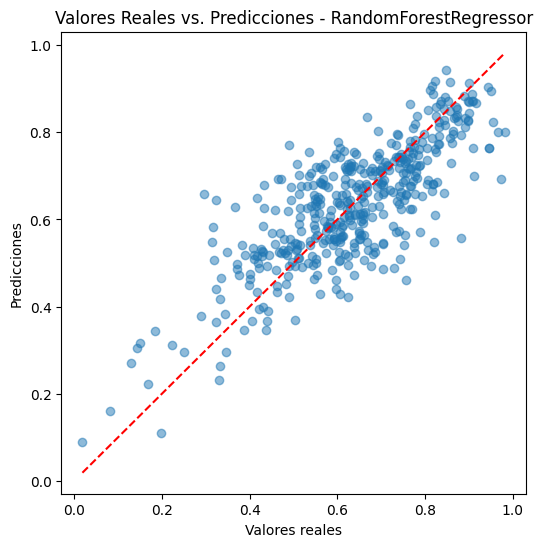

In [73]:
# Dispersión

plt.figure(figsize=(6,6))
plt.scatter(y_testr, y_pred_rfr, alpha=0.5)
plt.plot([min(y_testr), max(y_testr)], [min(y_testr), max(y_testr)], color='red', linestyle='--')  # Línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones - RandomForestRegressor")
plt.show()